# Amazon Product Review Analysis

### Grouping on the basis of Review id to make the type of customer based on there sentiment score

### Import required Python libraries

In [1]:
import pandas as pd
import re
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.cluster import DBSCAN, KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

### Load the dataset

In [2]:
sentiment=pd.read_csv('data_cluster_cluster.csv')

### Check the structure of data

In [7]:
sentiment.columns

Index(['overall', 'reviewerID', 'verified', 'reviewTime', 'asin',
       'sentiment_score_(compound)', 'sentiment', 'rating', 'main_cat',
       'brand', 'price'],
      dtype='object')

### Grouping the data to check the customer type based on there sentiment

In [4]:
ss=sentiment.groupby(by='reviewerID').agg({'rating':'mean', 'asin':'count','price':'sum','sentiment_score_(compound)':'mean'})

In [24]:
ss

,rating,asin,price,sentiment_score_(compound)
reviewerID,,,,
A0001528BGUBOEVR6T5U,1.666667,9,527.19,0.374211
A0009478CBXKUCALUC7U,2.000000,8,126.56,0.714275
A0024836TBQJ1WBE4VDY,2.000000,14,318.89,0.720571
A0072041HVZ3465DXUOR,2.000000,1,19.99,0.111900
A0072193KFP6LUHKEXLT,2.000000,4,72.20,0.493050
...,...,...,...,...
AZZWZ1OLYCDR5,2.000000,5,218.62,0.639580
AZZX23UGJGKTT,1.500000,4,100.32,0.334425
AZZYJH0XNZ896,1.250000,4,136.82,0.146475


### Summarise the data

In [72]:
ss.describe() # summarize the data

,rating,asin,price,sentiment_score_(compound)
count,292948.000000,292948.000000,292948.000000,292948.000000
mean,1.740519,5.523223,180.862355,0.557339
std,0.373408,5.498028,258.460053,0.282560
min,0.000000,1.000000,0.200000,-0.990300
25%,1.571429,3.000000,45.160000,0.398933
50%,2.000000,4.000000,98.510000,0.598600
75%,2.000000,6.000000,212.852500,0.774750
max,2.000000,256.000000,9631.560000,0.999700


### Data Scaling using minmax scaler

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaled_df1=pd.DataFrame(MinMaxScaler().fit_transform(ss.to_numpy()),columns=ss.columns)

# Kmeans Clustering

### Finding the optimum value of K using Elbow Method

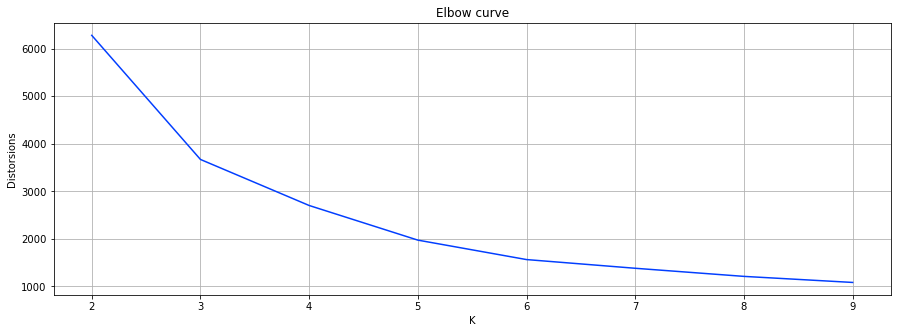

In [529]:
#Apply K-means Algo
distorsions = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(scaled_df1)
    distorsions.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 10), distorsions)
plt.grid(True)
plt.xlabel('K')
plt.ylabel('Distorsions')
plt.title('Elbow curve');

In [16]:
k_means_2=KMeans(n_clusters=3)
k_means_2.fit(scaled_df1)
y_hc3= k_means_2.fit_predict(scaled_df1)
kmeans_scaled_df=scaled_df1.copy()
kmeans_scaled_df['cluster']=y_hc3
y_hc3

array([0, 2, 2, ..., 0, 2, 2])

In [17]:
u=pd.DataFrame(y_hc3)

In [18]:
u.value_counts()

2    177324
0     87853
1     27771
dtype: int64

In [12]:
scaled_df1

,rating,asin,price,sentiment_score_(compound)
0,0.833333,0.031373,0.054716,0.685684
1,1.000000,0.027451,0.013120,0.856570
2,1.000000,0.050980,0.033089,0.859734
3,1.000000,0.000000,0.002055,0.553869
4,1.000000,0.011765,0.007476,0.745402
...,...,...,...,...
292943,1.000000,0.015686,0.022678,0.819035
292944,0.750000,0.011765,0.010395,0.665691
292945,0.625000,0.011765,0.014185,0.571244
292946,0.857143,0.023529,0.030509,0.896274


In [61]:
kmeans_scaled_df_sample=kmeans_scaled_df.sample(n=100000,random_state=1)
y_hc3=kmeans_scaled_df_sample['cluster']

In [311]:
print('Silhouette_Score -->  ',round(silhouette_score(kmeans_scaled_df_sample,y_hc3),2))

Silhouette_Score -->   0.89


In [19]:
kmeans_scaled_df['cluster'].value_counts()

2    177324
0     87853
1     27771
Name: cluster, dtype: int64

In [20]:
kmeans_scaled_df

,rating,asin,price,sentiment_score_(compound),cluster
0,0.833333,0.031373,0.054716,0.685684,0
1,1.000000,0.027451,0.013120,0.856570,2
2,1.000000,0.050980,0.033089,0.859734,2
3,1.000000,0.000000,0.002055,0.553869,0
4,1.000000,0.011765,0.007476,0.745402,2
...,...,...,...,...,...
292943,1.000000,0.015686,0.022678,0.819035,2
292944,0.750000,0.011765,0.010395,0.665691,0
292945,0.625000,0.011765,0.014185,0.571244,0
292946,0.857143,0.023529,0.030509,0.896274,2


### Scatter plot of sentiment score vs review count

In [75]:
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=False)
fig = px.scatter(kmeans_scaled_df, x='sentiment_score_(compound)', y='asin', color='cluster')
fig.update_layout(yaxis_title='Count of review', xaxis_title='Sentiment_score')
fig.show()

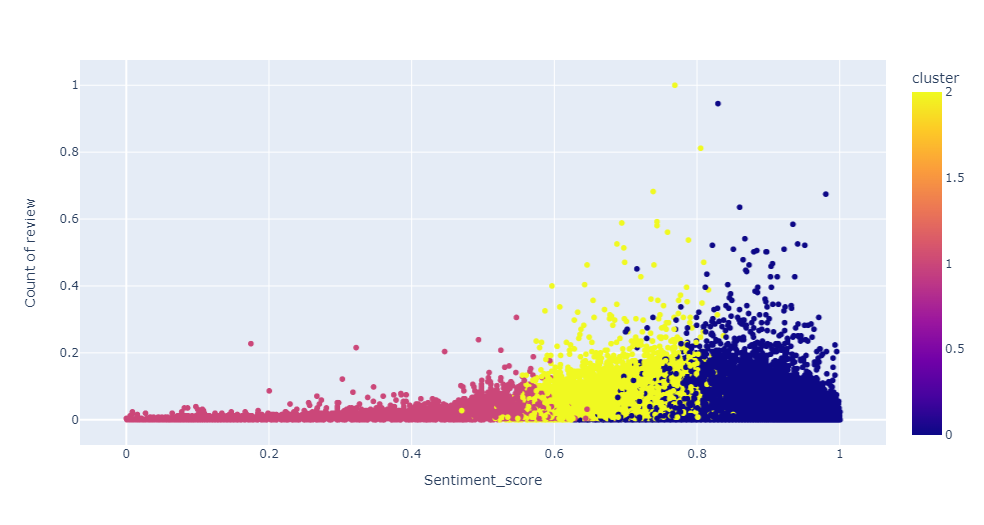

##### Conclusion= K means is able make good cluster on the type of customer based on the sentiment score(0.89). we see that cluster 1 & 2 are there customer who tend to buy more products compared to cluster 0 

# Agglomerative Hierarchical clustering algorithm

In [532]:
sam=scaled_df1.sample(n=10000,random_state=1) #considering sample data

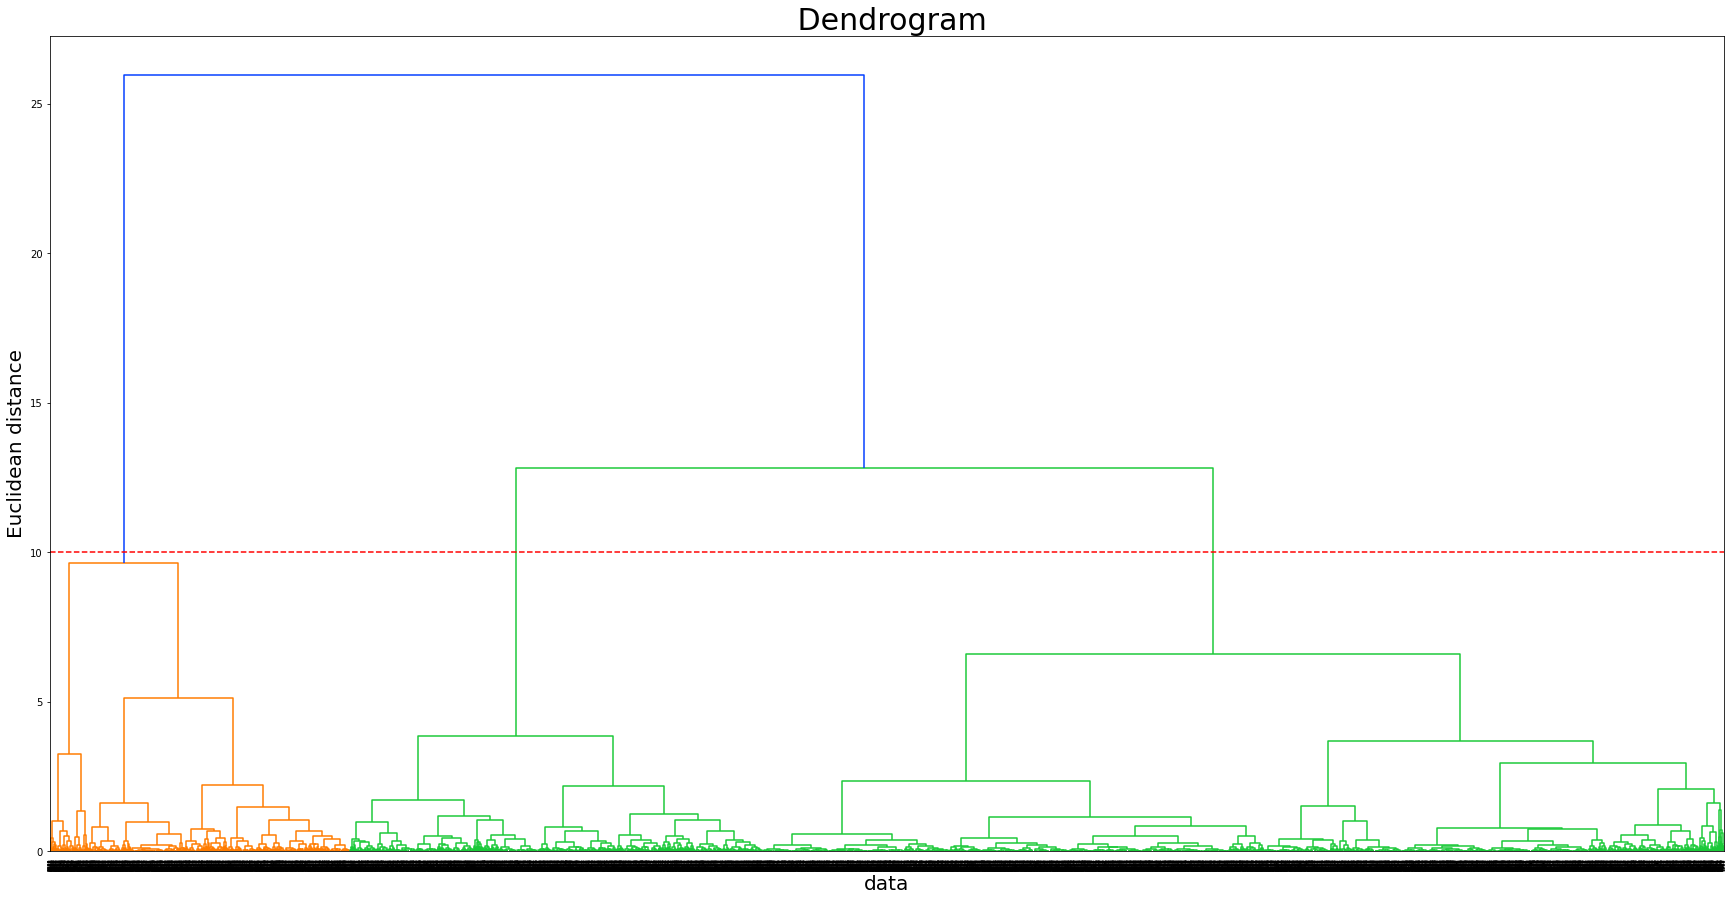

In [510]:
plt.figure(figsize=(30, 15))
dendrogram(linkage(sam, method='ward', metric='euclidean'))
plt.axhline(y=10, color='r', linestyle='--')  
plt.title(' Dendrogram',fontsize=30)
plt.xlabel('data',fontsize=20)
plt.ylabel('Euclidean distance', fontsize=20)
plt.show()

In [533]:
Agglo_2=AgglomerativeClustering(n_clusters=3,affinity = 'euclidean',linkage='ward')
y_pred1 = Agglo_2.fit_predict(sam)

In [361]:
print('Silhouette_Score -->  ',round(silhouette_score(sam,y_pred1),2))

Silhouette_Score -->   0.46


In [534]:
Agglo_2_scaled_df=sam.copy()
Agglo_2_scaled_df['label']=y_pred1
y_pred1

array([2, 2, 1, ..., 1, 2, 1], dtype=int64)

### Scatter plot of sentiment score vs review count

In [47]:
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=False)
px.scatter(Agglo_2_scaled_df, x='sentiment_score_(compound)', y='asin', color='label')
fig.update_layout(yaxis_title='Count of review', xaxis_title='Sentiment_score')
fig.show()

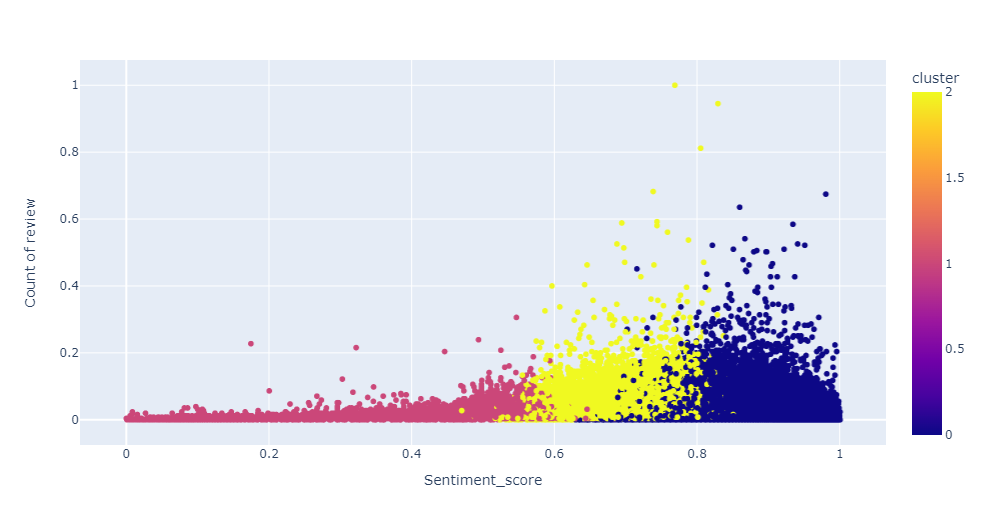

##### Conclusion:We see that cluster are fromed but are not seprated well and the score is also 0.46.

# DBSCAN clustering algorithm

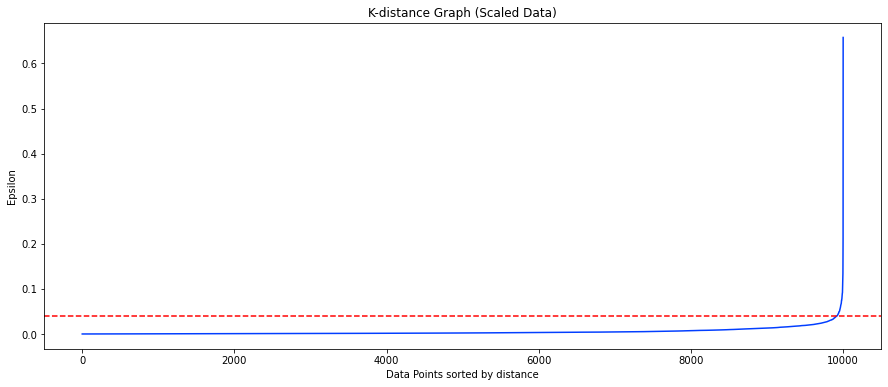

In [537]:
from sklearn.neighbors import NearestNeighbors
neigh2 = NearestNeighbors(n_neighbors=2)
nbrs2 = neigh2.fit(sam)
distances2, indices2 = nbrs2.kneighbors(sam)

# Plotting K-distance Graph
plt.figure(figsize=(15,6),facecolor='white')
distances2 = np.sort(distances2, axis=0)
distances2 = distances2[:,1]
plt.plot(distances2)
plt.axhline(y=0.04, color='r', linestyle='--')
plt.title('K-distance Graph (Scaled Data)')
plt.xlabel('Data Points sorted by distance')
plt.ylabel('Epsilon')
plt.show()

In [538]:
from sklearn.cluster import DBSCAN
eps=0.04
for min_samples in [2,4,5,6,10, 11, 12, 13,14,15]:
    clusterer = DBSCAN(eps=eps, min_samples=min_samples)
    cluster_labels = clusterer.fit_predict(sam)
    x= cluster_labels +2
    y = np.bincount(x)
    ii = np.nonzero(y)[0]
    results = list(zip(ii,y[ii]) )
    print('eps=',eps,'| min_samples= ', min_samples, '| obtained clustering: ', len(results))
    
    

dbscan_opt=DBSCAN(eps=0.05,min_samples=6)
dbscan_opt.fit(sam)
sam['DBSCAN_opt_labels']=dbscan_opt.labels_
sam['DBSCAN_opt_labels'].value_counts()

eps= 0.04 | min_samples=  2 | obtained clustering:  27
eps= 0.04 | min_samples=  4 | obtained clustering:  10
eps= 0.04 | min_samples=  5 | obtained clustering:  7
eps= 0.04 | min_samples=  6 | obtained clustering:  6
eps= 0.04 | min_samples=  10 | obtained clustering:  7
eps= 0.04 | min_samples=  11 | obtained clustering:  7
eps= 0.04 | min_samples=  12 | obtained clustering:  7
eps= 0.04 | min_samples=  13 | obtained clustering:  7
eps= 0.04 | min_samples=  14 | obtained clustering:  8
eps= 0.04 | min_samples=  15 | obtained clustering:  8


 0    9809
-1      92
 1      87
 2       6
 3       6
Name: DBSCAN_opt_labels, dtype: int64

In [268]:
from sklearn import metrics
print("Silhouette Coefficient with samples data: %0.3f" % metrics.silhouette_score(sam, sam['DBSCAN_opt_labels']))

Silhouette Coefficient with samples data: 0.776


In [48]:
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=False)
fig = px.scatter(sam, x='sentiment_score_(compound)', y='asin', color='DBSCAN_opt_labels')
fig.update_layout(yaxis_title='Count of review', xaxis_title='Sentiment_score')
fig.show()

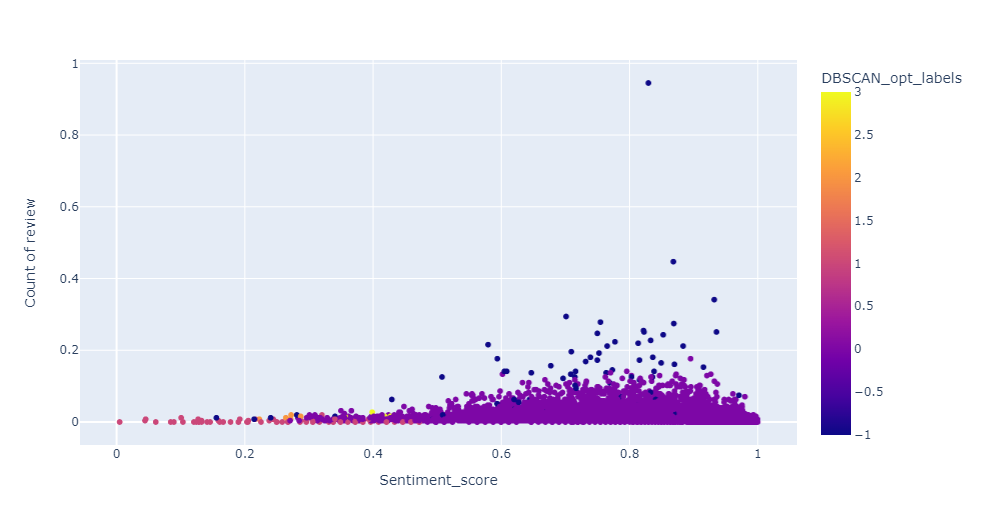

##### Conclusion: Dbscan is making clusters most of the cluster with label 0 have sentiment score ranging from 0.4 to 1.

In [36]:
#finding reviewerid with most negative score of cluster 1
ss1=ss.copy()

kmeans_scaled_df

ss1['cluster']=kmeans_scaled_df['cluster']

ss1[ss1['cluster']==1].sort_values(by='sentiment_score_(compound)',ascending=True)

sentiment[sentiment['reviewerID']=='A3210J89T0PWJ4']

,overall,reviewerID,verified,reviewTime,asin,sentiment_score_(compound),sentiment,rating,main_cat,brand,price
779876,1,A3210J89T0PWJ4,True,05-23-2016,B00O57L1NE,-0.9989,Negative,0,Tools & Home Improvement,Kraft Tool,55.48
815906,4,A3210J89T0PWJ4,True,05-10-2015,B00TSU5GB6,-0.9817,Negative,0,Industrial & Scientific,Rousmery,32.95
